 #  A Whale off the Port(folio)
 ---

In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Import libraries for data cleaning and analysis
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Set file path for the CSV file containing original data
file_path = Path("Resources/whale_returns.csv")

In [3]:
# Read in 'Whale Returns' CSV file
whale_returns_csv = pd.read_csv(file_path)
whale_returns_csv.head()

Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0  2015-03-02                        NaN                 NaN   
1  2015-03-03                  -0.001266           -0.004981   
2  2015-03-04                   0.002230            0.003241   
3  2015-03-05                   0.004016            0.004076   
4  2015-03-06                  -0.007905           -0.003574   

   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
0                          NaN                     NaN  
1                    -0.000496               -0.006569  
2                    -0.002534                0.004213  
3                     0.002355                0.006726  
4                    -0.008481               -0.013098

In [4]:
# View column data types by using the 'dtypes' attribute to list the column data types
whale_returns_csv.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [5]:
# Use the 'as_type' function to convert 'Date' from 'object' to 'datetime64'
whale_returns_csv['Date'] = whale_returns_csv['Date'].astype('datetime64')

# Use 'dtypes' attribute to ensure conversion processed correctly
whale_returns_csv.dtypes

Date                           datetime64[ns]
SOROS FUND MANAGEMENT LLC             float64
PAULSON & CO.INC.                     float64
TIGER GLOBAL MANAGEMENT LLC           float64
BERKSHIRE HATHAWAY INC                float64
dtype: object

In [6]:
# Identify the number of rows
whale_returns_csv.count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [7]:
# Identify null records within DataFrame
whale_returns_csv.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Remove null records from DataFrame using the 'dropna()' function
whale_returns_csv = whale_returns_csv.dropna()

# Confirm removal of null records using the 'isnull()' and 'sum()' function(s)
whale_returns_csv.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
# Check for duplicated rows using the 'duplicated' function
whale_returns_csv.duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
1055    False
1056    False
1057    False
1058    False
1059    False
Length: 1059, dtype: bool

In [10]:
# Set date as the index
whale_returns_csv.set_index(whale_returns_csv['Date'], inplace=True)
whale_returns_csv.head()

Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                   
2015-03-03 2015-03-03                  -0.001266           -0.004981   
2015-03-04 2015-03-04                   0.002230            0.003241   
2015-03-05 2015-03-05                   0.004016            0.004076   
2015-03-06 2015-03-06                  -0.007905           -0.003574   
2015-03-09 2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

In [11]:
# Drop extra 'Date' column
whale_returns_csv.drop(columns=['Date'], inplace=True)
whale_returns_csv.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

In [12]:
# Sort datetime index in ascending order (past to present)
whale_returns_csv.sort_index(inplace=True)

In [13]:
# Inspect the head of the revised DataFrame using the 'head()' function
whale_returns_csv.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

In [14]:
# Inspect the tail of the revised DataFrame using the 'tail' function
whale_returns_csv.tail()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2019-04-25                    -0.005153                0.004848  
2019-04-26                     0.012355                0.010434  
2019-04-29                     0.006251                0.005223  
2019-04-30                    -0.000259               -0.003702  
2019-05-01                    -0.007936               -0.007833

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [15]:
# Set the file path for the CSV file containing original data
file_path = Path("Resources/algo_returns.csv")

In [16]:
# Read in 'Algorithim Returns' CSV file 
algo_returns_df = pd.read_csv(file_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

# Inspect the first 10 rows of the DataFrame using the 'head()' function
algo_returns_df.head(10)

Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
2014-06-04 -0.001838       NaN
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735

In [17]:
# Identify null records within the DataFrame
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [18]:
# Use the 'fillna()' function to replace null records with '0'
algo_returns_df = algo_returns_df.fillna(0)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [19]:
# Re-inspect the head of the DataFrame 
algo_returns_df.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     0.0
2014-05-29  0.003978     0.0
2014-05-30  0.004464     0.0
2014-06-02  0.005692     0.0
2014-06-03  0.005292     0.0

In [20]:
# Inspect tail of the DataFrame
algo_returns_df.tail()

Algo 1    Algo 2
Date                          
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

In [21]:
# Inspect data types using the 'dtypes()' function
algo_returns_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [22]:
# Check for duplicated rows using the 'duplicated' function
algo_returns_df.duplicated()

Date
2014-05-28    False
2014-05-29    False
2014-05-30    False
2014-06-02    False
2014-06-03    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1241, dtype: bool

In [23]:
# Calculate daily returns 
algo_daily_returns = algo_returns_df.pct_change()
algo_daily_returns.head()

Algo 1  Algo 2
Date                        
2014-05-28       NaN     NaN
2014-05-29  1.280156     NaN
2014-05-30  0.122192     NaN
2014-06-02  0.275137     NaN
2014-06-03 -0.070296     NaN

In [24]:
# Replace null values with - from the new DataFrame
algo_daily_returns = algo_daily_returns.fillna(0)
algo_daily_returns.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.000000     0.0
2014-05-29  1.280156     0.0
2014-05-30  0.122192     0.0
2014-06-02  0.275137     0.0
2014-06-03 -0.070296     0.0

## S&P TSX Returns

Read the S&P TSX historic closing prices and create a new daily returns DataFrame from the data. 

In [25]:
# Set file path for CSV file
sp_tsx_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp_tsx_df = sp_tsx_df.sort_index()
sp_tsx_df.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [26]:
# Inspect data types within DataFrame
sp_tsx_df.dtypes

Close    object
dtype: object

In [27]:
# Remove '$' from 'Close' column
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '', regex=False)
sp_tsx_df.head()

Close
Date                 
2012-10-01  12,370.19
2012-10-02  12,391.23
2012-10-03  12,359.47
2012-10-04  12,447.68
2012-10-05  12,418.99

In [28]:
# Remove ',' from 'Close' column
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '', regex=False)
sp_tsx_df.head()

Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99

In [29]:
# Convert data type from 'object' to 'float' within the 'Close' column
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float64")
sp_tsx_df.head()

Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99

In [30]:
# Inspect DataFrame for null records
sp_tsx_df.isnull().sum()

Close    0
dtype: int64

<AxesSubplot:title={'center':'Daily Close for S&P TSX'}, xlabel='Date'>

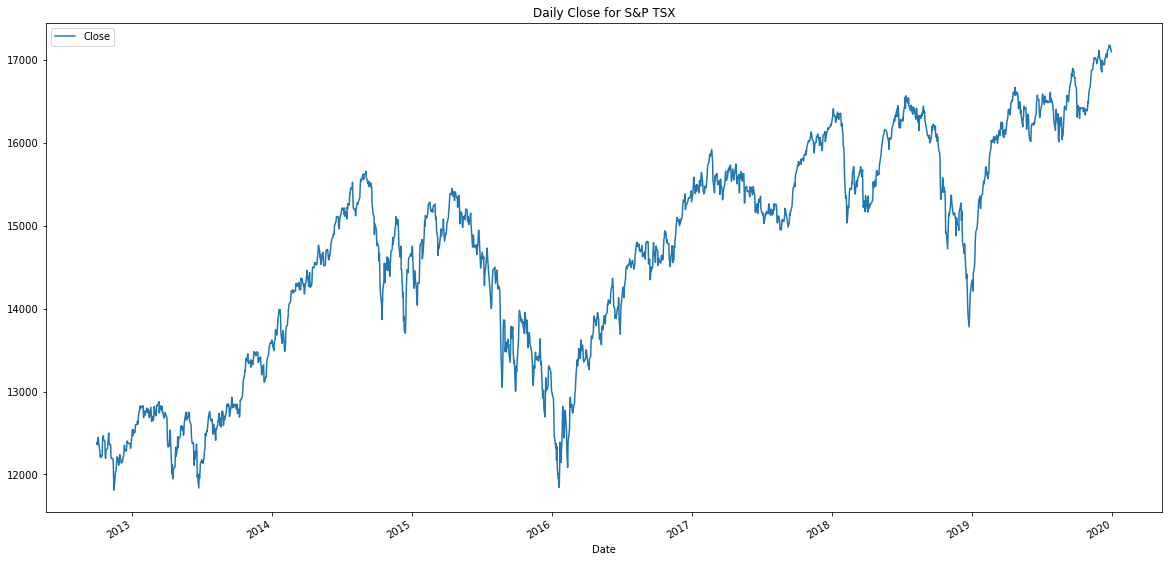

In [31]:
# Plot daily close
sp_tsx_df.plot(figsize=(20,10), title='Daily Close for S&P TSX')

In [32]:
# Calculate 'Daily Returns' 
# Output assigned to new DataFrame 'sp_tsx_daily_returns'
sp_tsx_daily_returns = sp_tsx_df.pct_change()
sp_tsx_daily_returns.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305

In [33]:
# Replace null values with '0'
sp_tsx_daily_returns = sp_tsx_daily_returns.fillna(0)
sp_tsx_daily_returns.head()

Close
Date                
2012-10-01  0.000000
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305

In [34]:
# Confirm removal of null values from DataFrame
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

<AxesSubplot:title={'center':'Daily Returns for S&P TSX'}, xlabel='Date'>

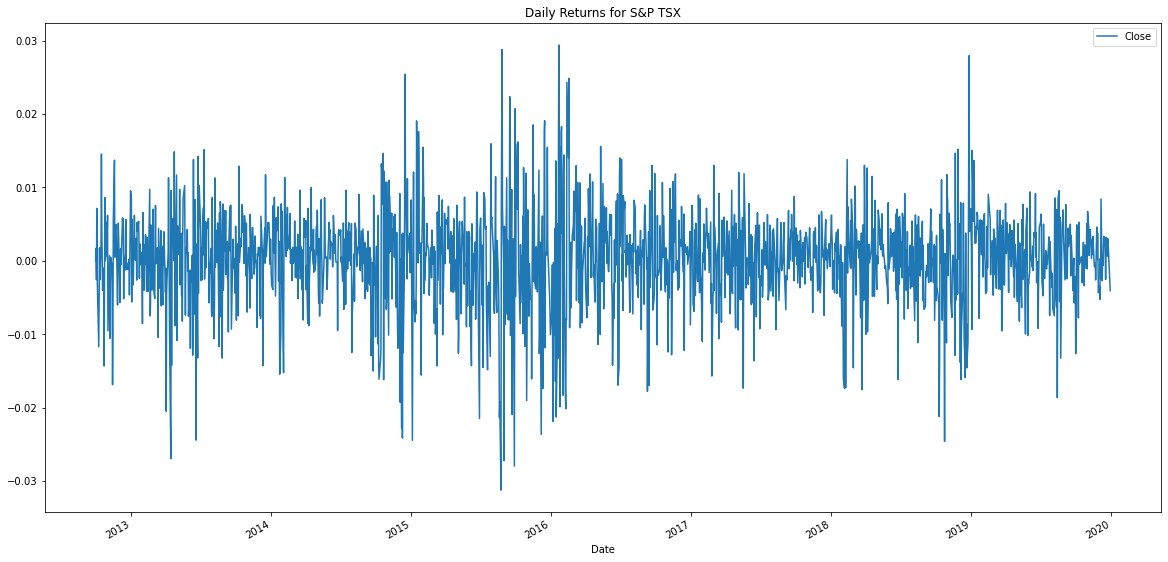

In [35]:
# Plot daily returns
sp_tsx_daily_returns.plot(figsize=(20,10), title ='Daily Returns for S&P TSX')

In [36]:
# Rename `Close` Column to be specific to this portfolio (closing prices)
sp_tsx_df = sp_tsx_df.rename(columns = {'Close':'S&P TSX'})
sp_tsx_df.head()

S&P TSX
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99

In [37]:
# Rename 'Close' column to be specific to this portfolio (daily returns)
sp_tsx_daily_returns= sp_tsx_daily_returns.rename(columns = {'Close':'S&P TSX'})
sp_tsx_df.head()

S&P TSX
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [38]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_csv, algo_returns_df, sp_tsx_daily_returns], axis='columns', join='inner')
combined_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-25                    -0.005153                0.004848  0.000682   
2019-04-26                     0.012355                0.010434  0.002981   
2019-04-29                     0.006251                0.005223  0.005208   
2019-04-30                    -0.000259               -0.003702 -0.002944   
2019-05-01                    -0.007936               -0.007833  0.000094   

              Algo 2   S&P TSX  
Date                            
2015-03-03 -0.000949 -0.008530  
2015-03-04  0.002416 -0.003371  
2015-03-05  0.004323  0.001344  
2015-03-06 -0.011460 -0.009972  
2015-03-09  0.001303 -0.006555  
...              ...       ...  
2019-04-25 -0.007247 -0.000628  
2019-04-26  0.005256  0.002254  
2019-04-29  0.002829 -0.000788  
2019-04-30 -0.001570 -0.001183  
2019-05-01 -0.007358 -0.004703  

[1029 rows x 7 columns]

In [39]:
# Data integrity check
combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns for all Portfolios'}, xlabel='Date'>

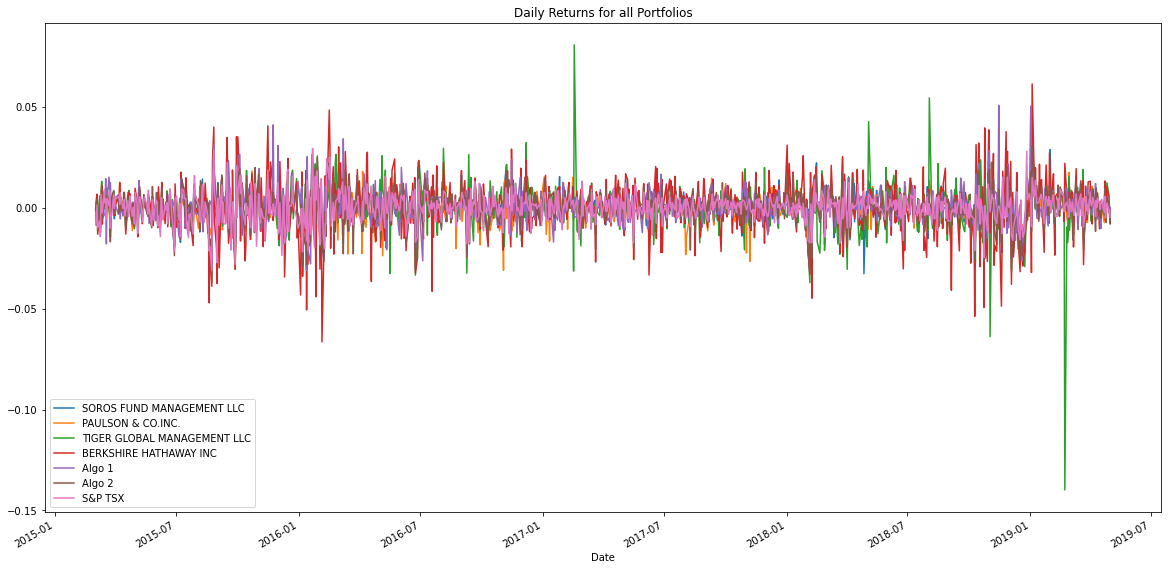

In [40]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10),title='Daily Returns for all Portfolios')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns for all Portfolios'}, xlabel='Date'>

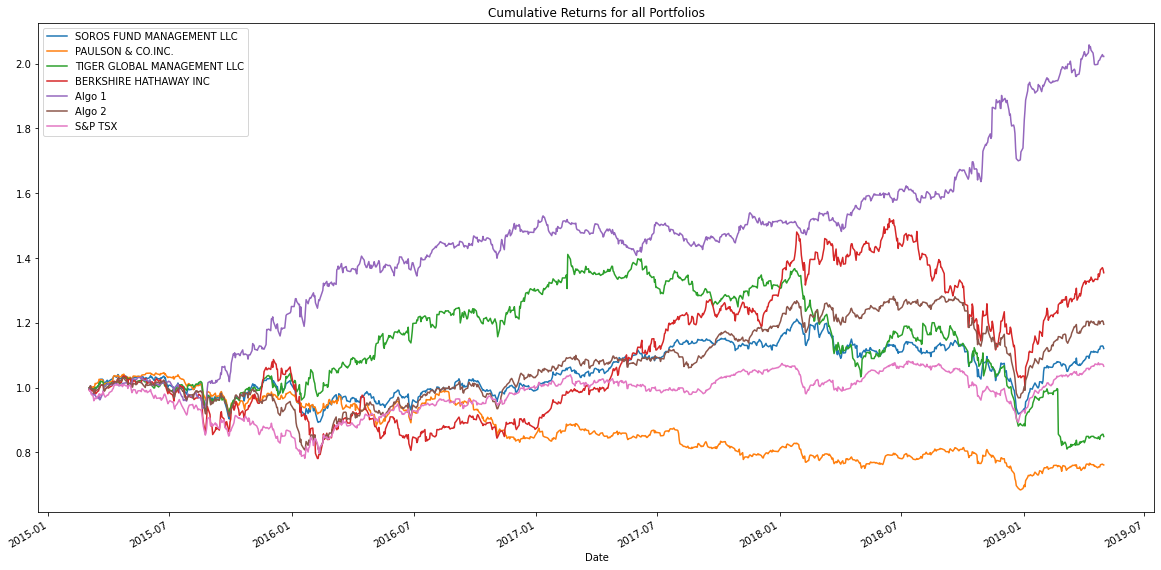

In [41]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ combined_df).cumprod()

# Plot cumulative returns 
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns for all Portfolios')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Boxplot Representation of Portfolio Analysis'}>

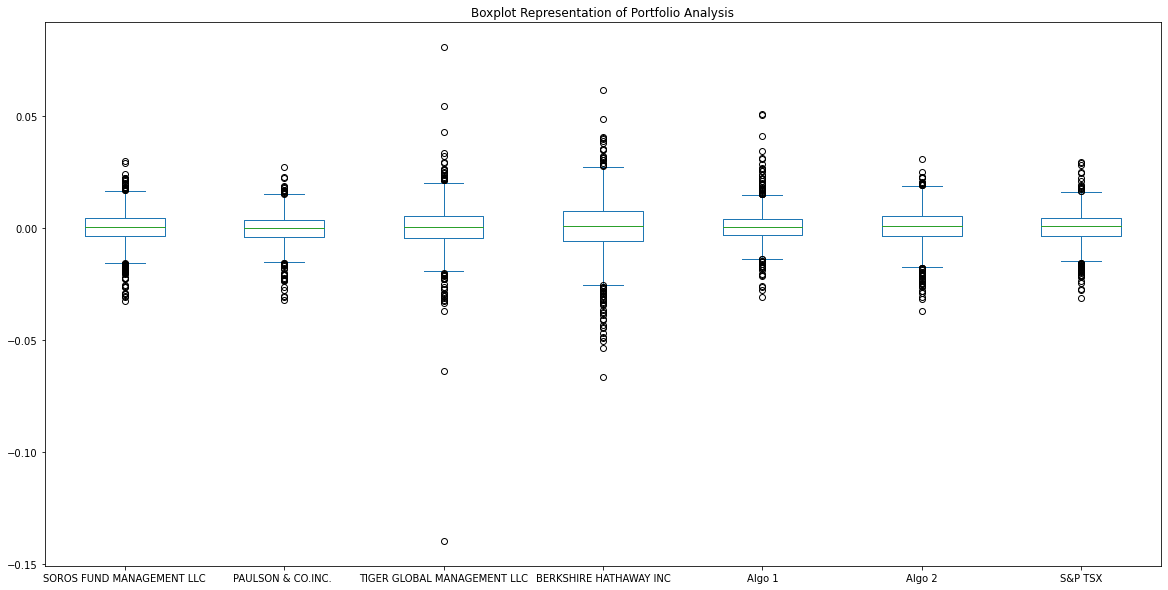

In [42]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10),title="Boxplot Representation of Portfolio Analysis")

### Calculate Standard Deviations

In [43]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [44]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_risk = combined_df["S&P TSX"].std()
sp_tsx_risk

# Determine which portfolios are riskier than the S&P TSX 60
combined_df.std() > sp_tsx_risk

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.rolling(window=252).std()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-25                   0.008976            0.007109   
2019-04-26                   0.008983            0.007131   
2019-04-29                   0.008967            0.007123   
2019-04-30                   0.008954            0.007118   
2019-05-01                   0.008960            0.007118   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN                     NaN       NaN   
2015-03-04                          NaN                     NaN       NaN   
2015-03-05                          NaN                     NaN       NaN   
2015-03-06                          NaN                     NaN       NaN   
2015-03-09                          NaN                     NaN       NaN   
...                                 ...                     ...       ...   
2019-04-25                     0.014476                0.014715  0.008119   
2019-04-26                     0.014498                0.014726  0.008107   
2019-04-29                     0.014486                0.014730  0.008104   
2019-04-30                     0.014442                0.014722  0.008107   
2019-05-01                     0.014442                0.014725  0.008102   

              Algo 2   S&P TSX  
Date                            
2015-03-03       NaN       NaN  
2015-03-04       NaN       NaN  
2015-03-05       NaN       NaN  
2015-03-06       NaN       NaN  
2015-03-09       NaN       NaN  
...              ...       ...  
2019-04-25  0.008389  0.006165  
2019-04-26  0.008395  0.006126  
2019-04-29  0.008390  0.006117  
2019-04-30  0.008386  0.006117  
2019-05-01  0.008395  0.006119  

[1029 rows x 7 columns]

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation 21 day Window'}, xlabel='Date'>

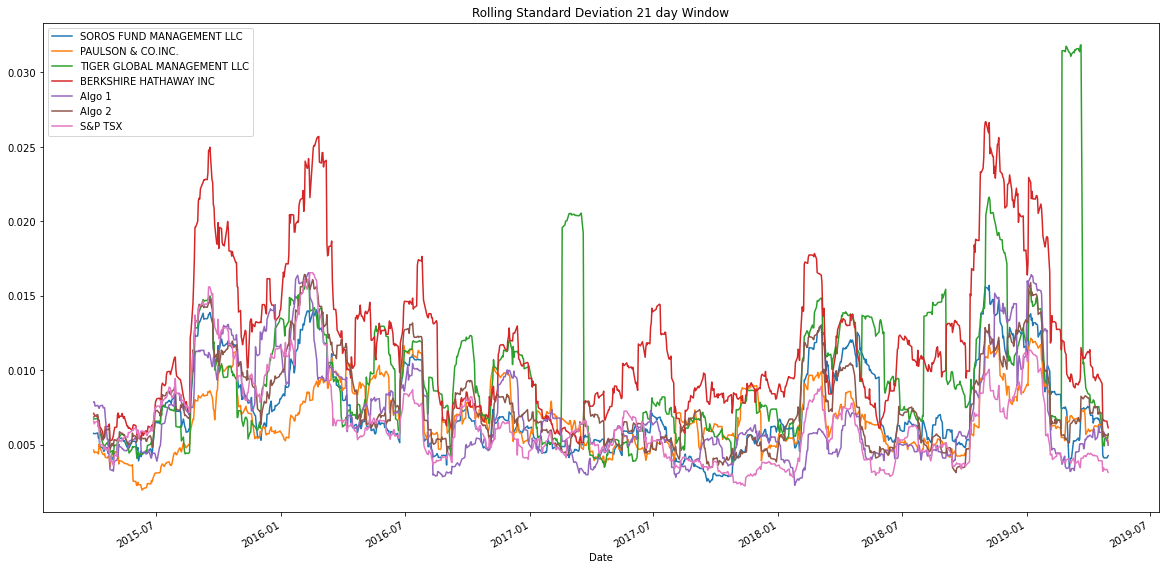

In [46]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()

# Plot the rolling standard deviation (21 day window)
combined_df.rolling(window=21).std().plot(figsize=(20,10),title="Rolling Standard Deviation 21 day Window")

### Calculate and plot the correlation

<AxesSubplot:>

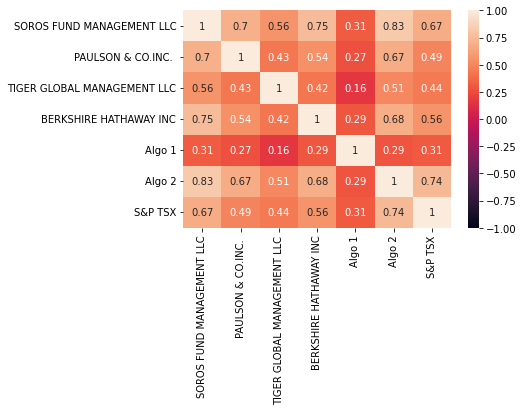

In [47]:
# Calculate the correlation using 'pearson' method
correlation_pearson = combined_df.corr(method='pearson')

# Display the correlation matrix
sns.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

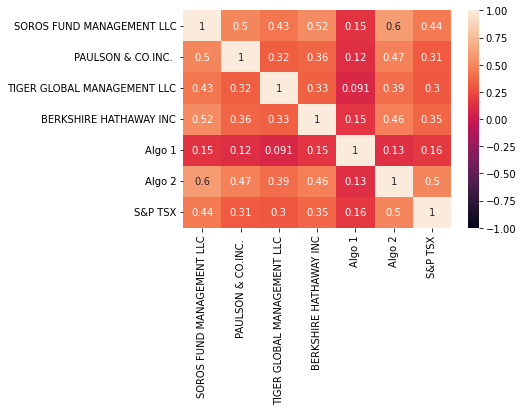

In [48]:
# Calculate the correlation using 'kendall' method
correlation_kendall = combined_df.corr(method='kendall')

# Display the correlation matrix
sns.heatmap(correlation_kendall, vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

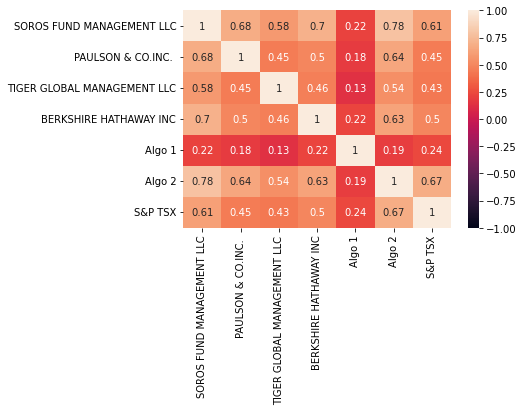

In [49]:
# Calculate the correlation using 'spearman' method
correlation_spearman = combined_df.corr(method='spearman')

# Display the correlation matrix
sns.heatmap(correlation_spearman, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P TSX

<AxesSubplot:title={'center':'Berkshire Hathaways Beta Trend Analysis'}, xlabel='Date'>

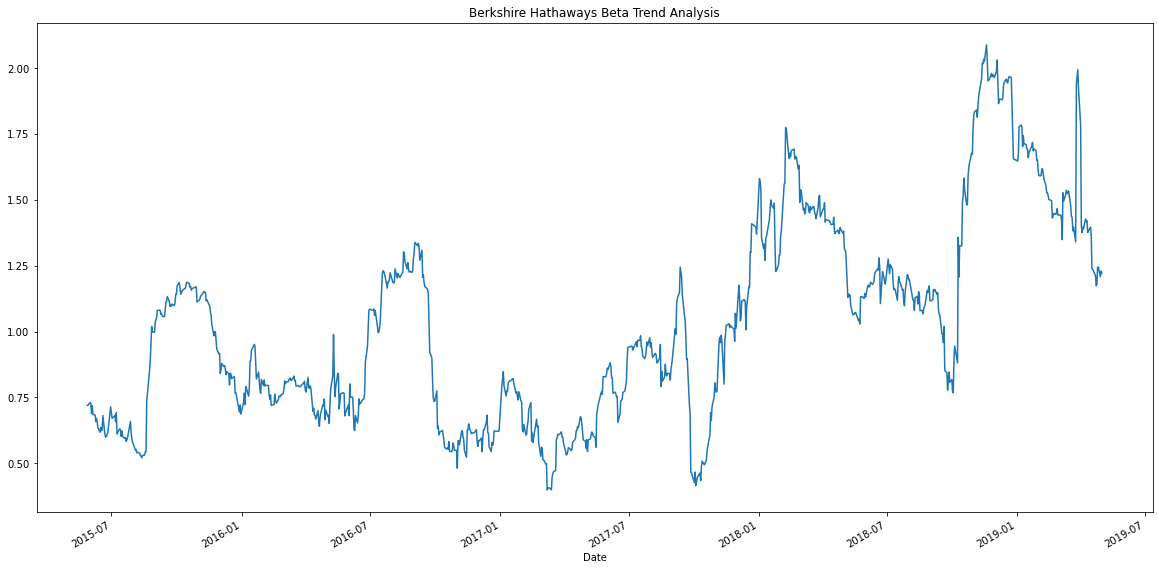

In [50]:
# Calculate covariance of a single portfolio
covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(60).cov(combined_df["S&P TSX"])

# Calculate variance of S&P 500
variance = combined_df['S&P TSX'].rolling(60).var()

# Computing beta
sp_TSX_beta = covariance / variance

# Plot beta trend
sp_TSX_beta.plot(figsize=(20,10), title='Berkshire Hathaways Beta Trend Analysis')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [51]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(com=None, span=None, halflife=21, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0).std().plot

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Annualized Sharpe Ratios
sharperatio = (combined_df.mean()*252)/(combined_df.std()* np.sqrt(252))
sharperatio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio Visualistation as a Bar Plot'}>

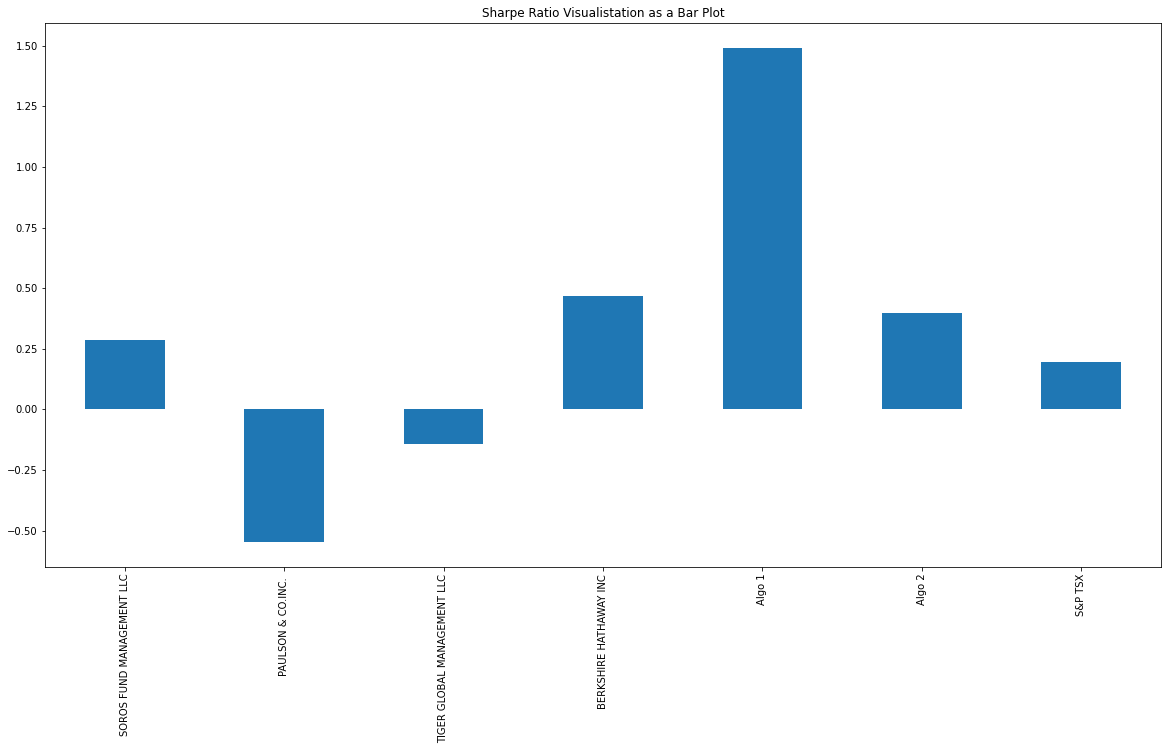

In [53]:
# Visualize the sharpe ratios as a bar plot
sharperatio.plot(kind='bar',figsize=(20,10),title='Sharpe Ratio Visualistation as a Bar Plot')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [54]:
# Reading data from 1st stock (Tesla)
tesla_csv = Path("Resources/tesla.csv")
tesla = pd.read_csv(tesla_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
tesla = tesla.sort_index()
tesla.head()

Close
Date             
2015-01-04  37.52
2015-01-05  45.21
2015-01-06  49.89
2015-01-07  53.83
2015-01-09  47.73

In [55]:
# Rename `Close` Column to be specific to the 'Tesla' portfolio
tesla = tesla.rename(columns = {'Close':'Tesla'})
tesla.head()

Tesla
Date             
2015-01-04  37.52
2015-01-05  45.21
2015-01-06  49.89
2015-01-07  53.83
2015-01-09  47.73

In [56]:
# Inspect data types within 'Tesla' DataFrame
tesla.dtypes

Tesla    float64
dtype: object

In [57]:
# Reading data from 2nd stock (Apple)
apple_csv = Path("Resources/apple.csv")
apple = pd.read_csv(apple_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
apple = apple.sort_index()
apple.head()

Close
Date             
2015-01-04  31.06
2015-01-05  32.24
2015-01-06  32.63
2015-01-07  31.65
2015-01-09  26.93

In [58]:
# Rename `Close` Column to be specific to the 'Apple' portfolio
apple = apple.rename(columns = {'Close':'Apple'})
apple.head()

Apple
Date             
2015-01-04  31.06
2015-01-05  32.24
2015-01-06  32.63
2015-01-07  31.65
2015-01-09  26.93

In [59]:
# Inspect data types within 'Apple' DataFrame
apple.dtypes

Apple    float64
dtype: object

In [60]:
# Reading data from 3rd stock (Facebook)
facebook_csv = Path("Resources/facebook.csv")
facebook = pd.read_csv(facebook_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
facebook = facebook.sort_index()
facebook.head()

Close
Date             
2015-01-04  81.67
2015-01-05  78.99
2015-01-06  80.29
2015-01-07  86.91
2015-01-09  87.23

In [61]:
# Rename `Close` Column to be specific to the 'Facebook' portfolio
facebook = facebook.rename(columns = {'Close':'Facebook'})
facebook.head()

Facebook
Date                
2015-01-04     81.67
2015-01-05     78.99
2015-01-06     80.29
2015-01-07     86.91
2015-01-09     87.23

In [62]:
# Inspect data types within 'Facebook' DataFrame
facebook.dtypes

Facebook    float64
dtype: object

In [63]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([tesla, apple, facebook], axis='columns', join='inner')
my_portfolio

Tesla  Apple  Facebook
Date                              
2015-01-04  37.52  31.06     81.67
2015-01-05  45.21  32.24     78.99
2015-01-06  49.89  32.63     80.29
2015-01-07  53.83  31.65     86.91
2015-01-09  47.73  26.93     87.23
...           ...    ...       ...
2019-11-03  58.18  44.73    172.07
2019-11-04  53.68  49.74    177.51
2019-12-02  62.36  42.72    165.04
2019-12-03  56.67  45.23    171.92
2019-12-04  53.54  49.72    179.10

[1048 rows x 3 columns]

In [64]:
# Calculate daily returns
daily_returns = my_portfolio.pct_change()

In [65]:
# Inspect DataFrame for null values
my_portfolio.isnull().sum()

Tesla       0
Apple       0
Facebook    0
dtype: int64

In [66]:
# Display sample data (first 10 rows)
daily_returns.head(10)

Tesla     Apple  Facebook
Date                                    
2015-01-04       NaN       NaN       NaN
2015-01-05  0.204957  0.037991 -0.032815
2015-01-06  0.103517  0.012097  0.016458
2015-01-07  0.078974 -0.030034  0.082451
2015-01-09 -0.113320 -0.149131  0.003682
2015-01-10  0.005238  0.017453  0.042646
2015-01-12 -0.011255  0.070803  0.177790
2015-02-04 -0.194772  0.067825 -0.238611
2015-02-06  0.300262  0.037025 -0.013732
2015-02-07  0.127441 -0.027085  0.085157

In [67]:
# Display sample data (last 10 rows)
daily_returns.tail(10)

Tesla     Apple  Facebook
Date                                    
2019-09-04 -0.195687  0.301331  0.231228
2019-10-01  0.266801 -0.229150 -0.187972
2019-10-04 -0.199739  0.304551  0.233148
2019-11-01  0.257924 -0.241029 -0.191317
2019-11-02 -0.099064  0.112687  0.152921
2019-11-03 -0.070161  0.055949  0.037879
2019-11-04 -0.077346  0.112005  0.031615
2019-12-02  0.161699 -0.141134 -0.070250
2019-12-03 -0.091244  0.058755  0.041687
2019-12-04 -0.055232  0.099270  0.041764

<AxesSubplot:title={'center':'Daily Returns for Tesla, Apple & Facebook'}, xlabel='Date'>

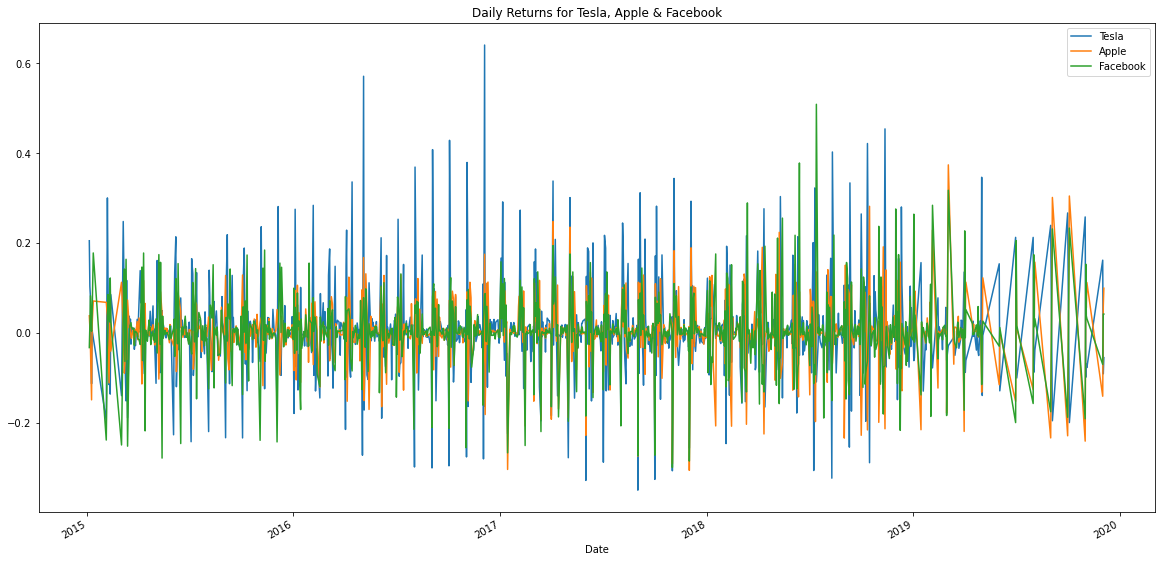

In [68]:
# Plot sample data (Daily returns for Tesla, Apple & Facebook)
daily_returns.plot(figsize=(20,10), title='Daily Returns for Tesla, Apple & Facebook')

<AxesSubplot:title={'center':'Daily Close for Tesla, Apple & Facebook'}, xlabel='Date'>

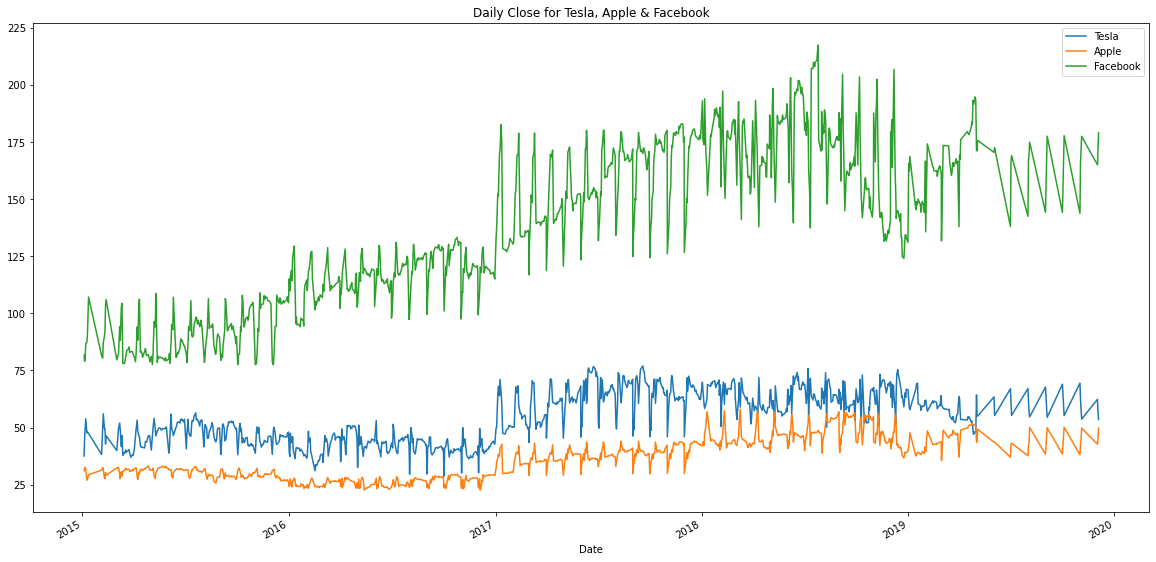

In [69]:
# Plot sample data (Daily close for Tesla, Apple & Facebook)
my_portfolio.plot(figsize=(20,10), title='Daily Close for Tesla, Apple & Facebook')

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [70]:
# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head(10)

Date
2015-01-04         NaN
2015-01-05    0.070044
2015-01-06    0.044024
2015-01-07    0.043797
2015-01-09   -0.086256
2015-01-10    0.021779
2015-01-12    0.079113
2015-02-04   -0.121853
2015-02-06    0.107852
2015-02-07    0.061837
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [73]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([combined_df, portfolio_returns], axis='columns', join='inner')
combined_df = combined_df.rename(columns = {0: 'My Portfolio'})
combined_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
2015-03-11                   0.004012            0.005163   
2015-03-12                   0.008265            0.010272   
...                               ...                 ...   
2019-03-04                  -0.002872           -0.002861   
2019-04-01                   0.009000            0.010073   
2019-04-02                   0.000193           -0.005619   
2019-04-03                   0.003562            0.001305   
2019-04-04                   0.001255            0.010630   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
2015-03-11                     0.003312               -0.001147  0.002994   
2015-03-12                     0.013117                0.010801 -0.002935   
...                                 ...                     ...       ...   
2019-03-04                     0.008612               -0.001126 -0.002931   
2019-04-01                     0.003972                0.013182  0.008159   
2019-04-02                    -0.006623                0.001152  0.003776   
2019-04-03                     0.005193                0.003252 -0.003337   
2019-04-04                     0.008459               -0.008037 -0.003597   

              Algo 2   S&P TSX  My Portfolio  
Date                                          
2015-03-03 -0.000949 -0.008530     -0.092312  
2015-03-06 -0.011460 -0.009972      0.096454  
2015-03-09  0.001303 -0.006555     -0.062475  
2015-03-11  0.000605  0.006655      0.040916  
2015-03-12  0.011667  0.002139      0.024789  
...              ...       ...           ...  
2019-03-04  0.002060 -0.001875      0.220888  
2019-04-01  0.007257  0.007823     -0.085526  
2019-04-02 -0.000413  0.002207      0.122209  
2019-04-03  0.000287  0.000983     -0.024097  
2019-04-04  0.003265  0.001950      0.034336  

[260 rows x 8 columns]

In [74]:
combined_df.tail()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-03-04                  -0.002872           -0.002861   
2019-04-01                   0.009000            0.010073   
2019-04-02                   0.000193           -0.005619   
2019-04-03                   0.003562            0.001305   
2019-04-04                   0.001255            0.010630   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-03-04                     0.008612               -0.001126 -0.002931   
2019-04-01                     0.003972                0.013182  0.008159   
2019-04-02                    -0.006623                0.001152  0.003776   
2019-04-03                     0.005193                0.003252 -0.003337   
2019-04-04                     0.008459               -0.008037 -0.003597   

              Algo 2   S&P TSX  My Portfolio  
Date                                          
2019-03-04  0.002060 -0.001875      0.220888  
2019-04-01  0.007257  0.007823     -0.085526  
2019-04-02 -0.000413  0.002207      0.122209  
2019-04-03  0.000287  0.000983     -0.024097  
2019-04-04  0.003265  0.001950      0.034336

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [75]:
# Calculate the annualized `std`
combined_df.rolling(window=252).std()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
2015-03-11                        NaN                 NaN   
2015-03-12                        NaN                 NaN   
...                               ...                 ...   
2019-03-04                   0.008419            0.008068   
2019-04-01                   0.008422            0.008067   
2019-04-02                   0.008415            0.008071   
2019-04-03                   0.008408            0.008030   
2019-04-04                   0.008404            0.008056   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN                     NaN       NaN   
2015-03-06                          NaN                     NaN       NaN   
2015-03-09                          NaN                     NaN       NaN   
2015-03-11                          NaN                     NaN       NaN   
2015-03-12                          NaN                     NaN       NaN   
...                                 ...                     ...       ...   
2019-03-04                     0.010818                0.014232  0.007847   
2019-04-01                     0.010791                0.014241  0.007856   
2019-04-02                     0.010797                0.014236  0.007853   
2019-04-03                     0.010799                0.014214  0.007850   
2019-04-04                     0.010811                0.014221  0.007845   

              Algo 2   S&P TSX  My Portfolio  
Date                                          
2015-03-03       NaN       NaN           NaN  
2015-03-06       NaN       NaN           NaN  
2015-03-09       NaN       NaN           NaN  
2015-03-11       NaN       NaN           NaN  
2015-03-12       NaN       NaN           NaN  
...              ...       ...           ...  
2019-03-04  0.009393  0.007133      0.084310  
2019-04-01  0.009375  0.007151      0.084515  
2019-04-02  0.009366  0.007145      0.084798  
2019-04-03  0.009362  0.007144      0.084803  
2019-04-04  0.009365  0.007128      0.084683  

[260 rows x 8 columns]

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

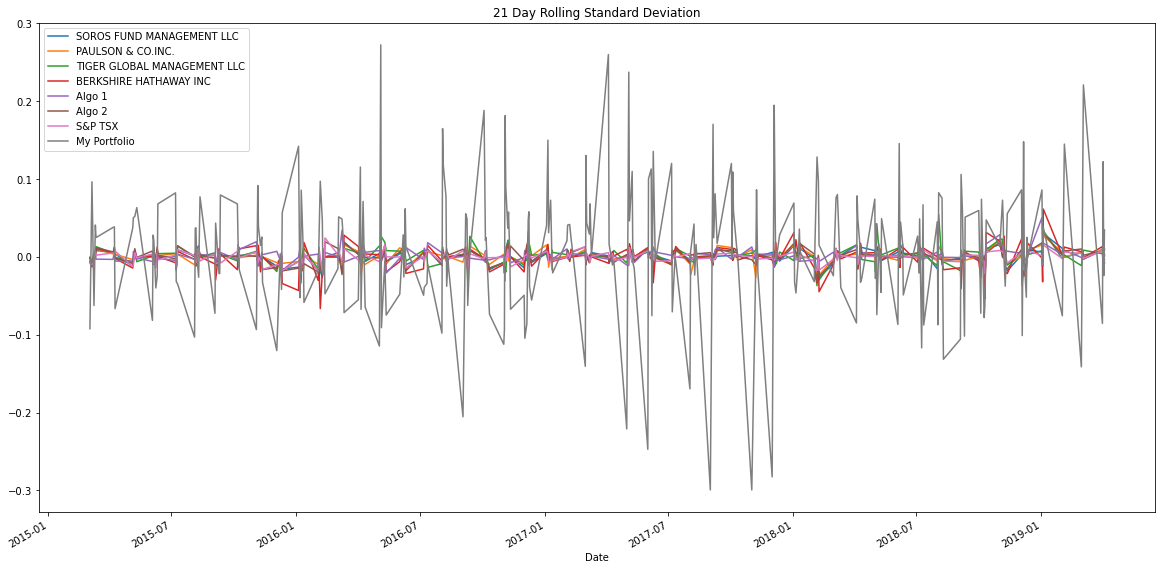

In [76]:
# Calculate rolling standard deviation
combined_df.rolling(window=21).std()

# Plot rolling standard deviation
combined_df.plot(figsize=(20,10), title='21 Day Rolling Standard Deviation')

### Calculate and plot the correlation

<AxesSubplot:>

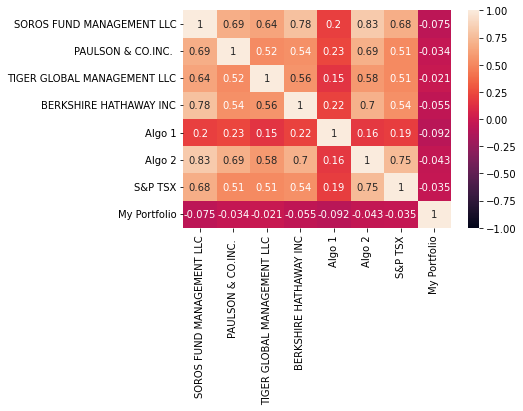

In [77]:
# Calculate and plot the correlation (pearson method)
correlation_pearson = combined_df.corr(method='pearson')

# Dispaly the correlation matrix 
sns.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

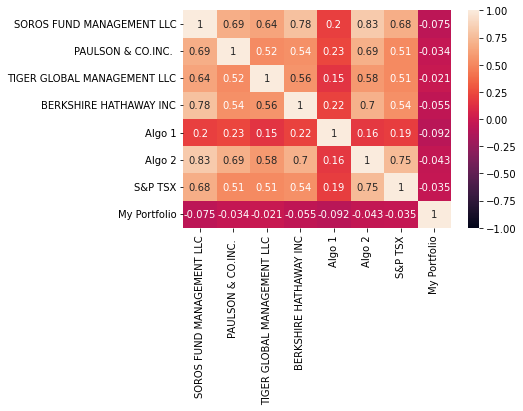

In [78]:
# Calculate and plot the correlation (kendall method) 
correlation_kendall = combined_df.corr(method='kendall')

# Display the correlation matrix
sns.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P TSX

<AxesSubplot:title={'center':'Beta Trend Analysis for My Stock Portfolio'}, xlabel='Date'>

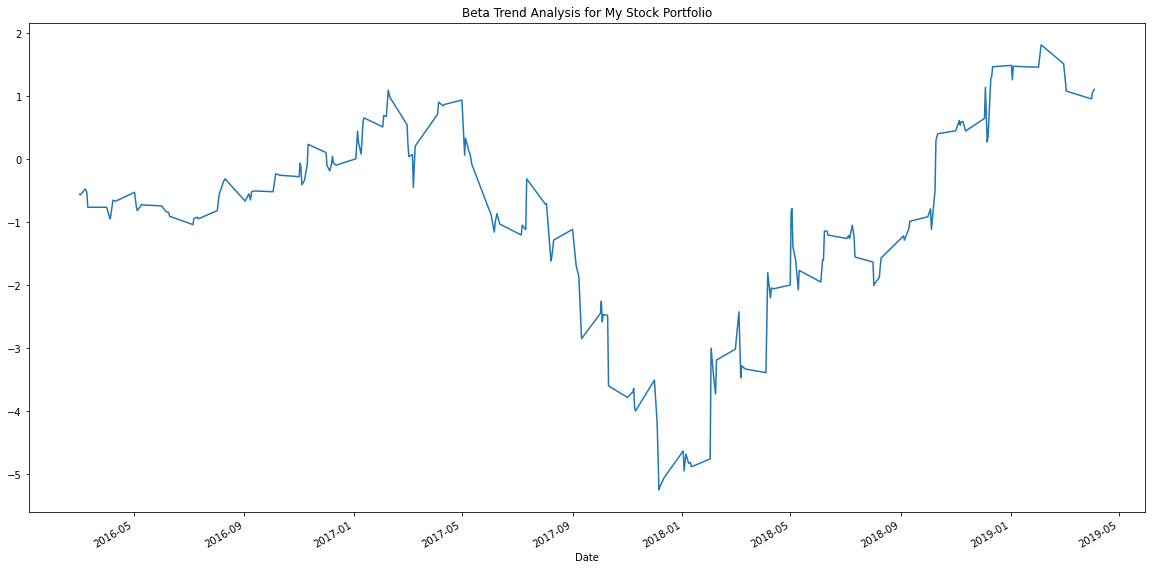

In [79]:
# Calculate covariance of a single portfolio
covariance = combined_df['My Portfolio'].rolling(60).cov(combined_df["S&P TSX"])

# Calculate variance of S&P 500
variance = combined_df['S&P TSX'].rolling(60).var()

# Computing beta
sp_TSX_beta = covariance / variance

# Plot beta trend
sp_TSX_beta.plot(figsize=(20,10), title='Beta Trend Analysis for My Stock Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [80]:
# Calculate Annualized Sharpe Ratios
sharperatio = (combined_df.mean()*252)/(combined_df.std()* np.sqrt(252))
sharperatio

SOROS FUND MANAGEMENT LLC     -0.598404
PAULSON & CO.INC.             -0.181363
TIGER GLOBAL MANAGEMENT LLC    0.903418
BERKSHIRE HATHAWAY INC        -0.998762
Algo 1                         1.901419
Algo 2                        -0.411966
S&P TSX                       -1.678867
My Portfolio                   1.697408
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio Visualistation as a Bar Plot'}>

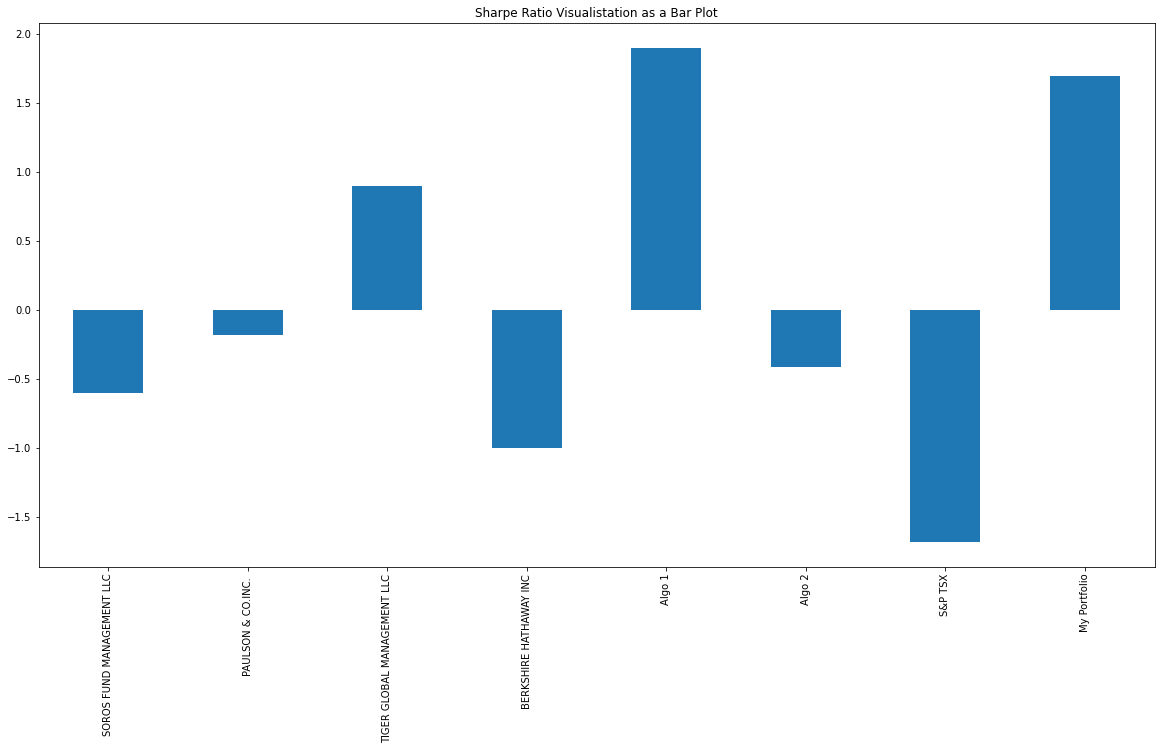

In [81]:
# Visualize the sharpe ratios as a bar plot
sharperatio.plot(kind='bar',figsize=(20,10),title='Sharpe Ratio Visualistation as a Bar Plot')

### How does your portfolio do?

- My stock portfolio demonstrates a beta value greater than 1.0 which indicates that my stock price is more volatile than the market. The beta coefficient suggests my stocks will increase a portfolio's risk, but may also increase the expected return.

- My portfolio demonstrates a low correlation which suggests a reduction in the overall risk to investors. 

- My portfolio demonstrates a relatively high sharpe ratio which suggests a high expected return for a relatively low amount of risk. 

- Overall, I would recommend investing in Apple, Tesla and Facebook stocks! 